In [4]:
# 📊 Data Handling
import pandas as pd
import numpy as np

# 📈 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 🧹 Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV

# 🧠 Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# 📊 Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

# 🧪 MLOps - MLflow
import mlflow
import mlflow.sklearn

# 🧠 Model Saving
import joblib

# 🌐 Deployment (API)
from flask import Flask, request, jsonify  # (Use only if you're using Flask API)
# or use FastAPI instead of Flask if preferred

# 📊 Interactive Dashboard
import streamlit as st

# 📁 File/OS
import os
import warnings
warnings.filterwarnings('ignore')


In [5]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [6]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace=True)
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})


In [7]:
data['AvgCharges'] = data['TotalCharges'] / (data['tenure'] + 1)
data['Engagement'] = data['MonthlyCharges'] * data['tenure']


In [8]:
data_encoded = pd.get_dummies(data, drop_first=True)


In [9]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [10]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[942  91]
 [200 174]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1033
           1       0.66      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Accuracy: 0.7931769722814499


In [13]:
import joblib
joblib.dump(model, "churn_model.joblib")


['churn_model.joblib']

In [14]:
# مثال بسيط:
from flask import Flask, request, jsonify
app = Flask(__name__)
model = joblib.load("churn_model.joblib")

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    df = pd.DataFrame([data])
    pred = model.predict(df)[0]
    return jsonify({'churn': int(pred)})

# شغّل السيرفر:
# app.run(debug=True)


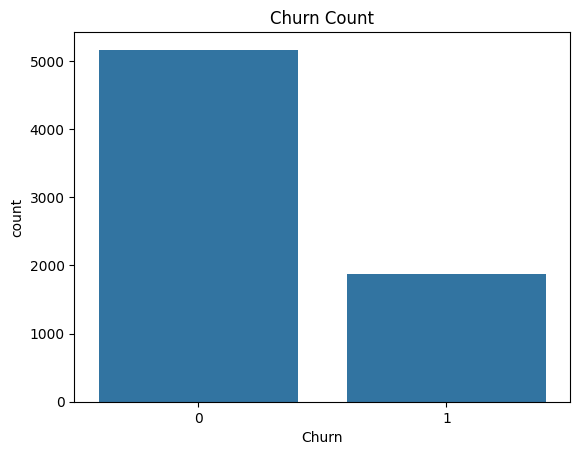

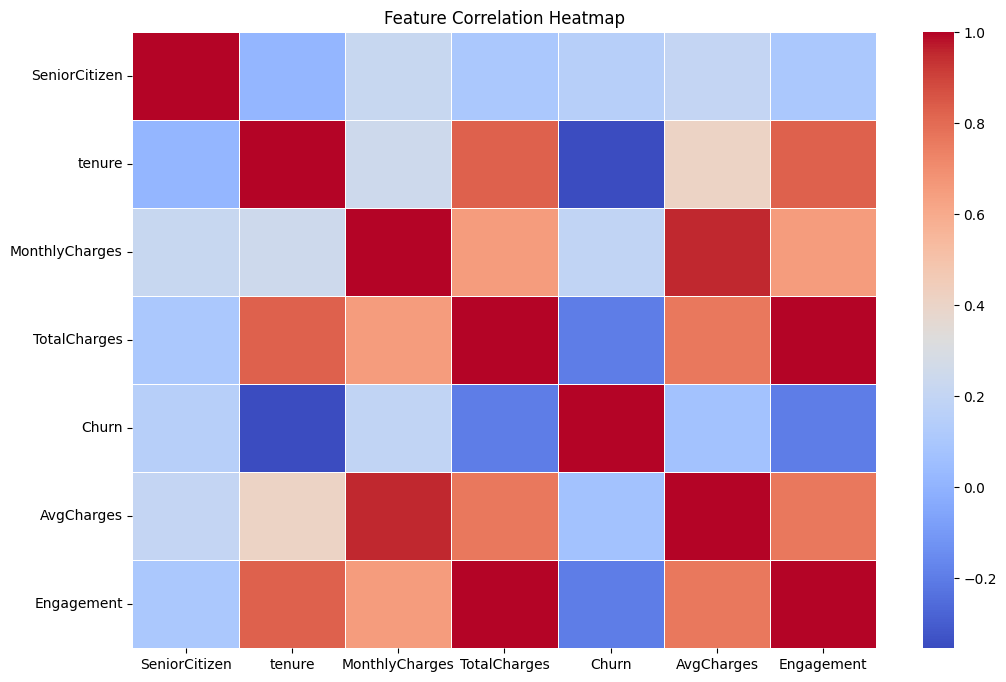

In [16]:
# ✅ Keep only numeric columns (excluding customerID if exists)
numeric_data = data_encoded.select_dtypes(include=['number'])

# ✅ Calculate correlation only on numeric data
corr = numeric_data.corr()

# ✅ Churn count visualization
sns.countplot(x='Churn', data=data_encoded)
plt.title("Churn Count")
plt.show()

# ✅ Heatmap for numeric features
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


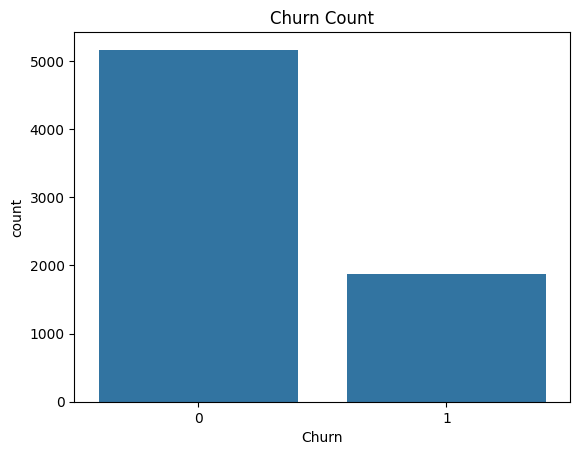

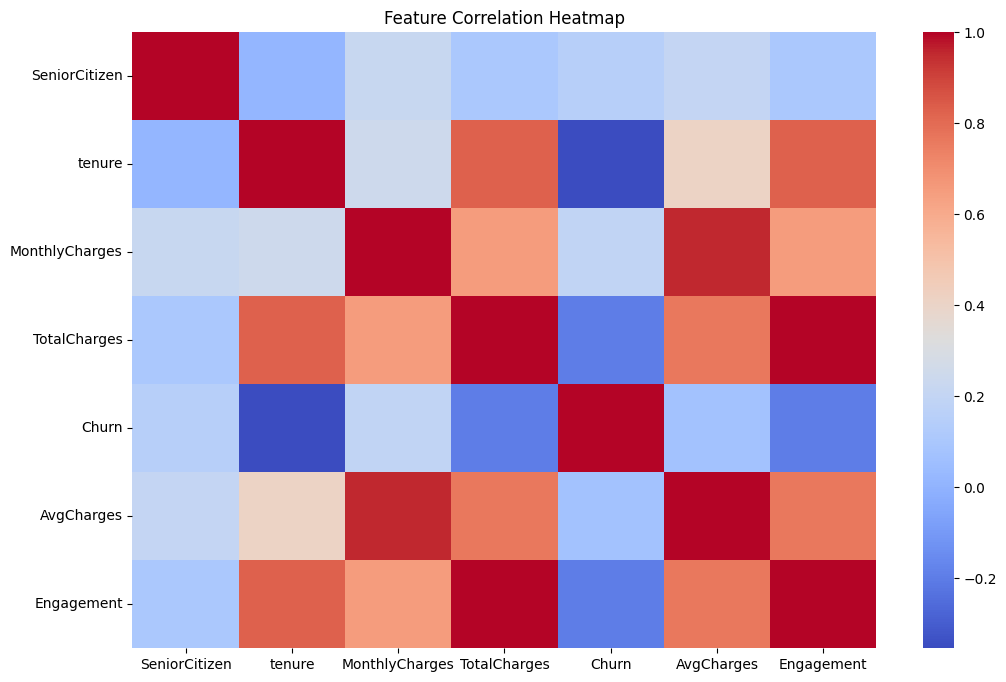

In [17]:
# 🔢 Keep only numeric features
numeric_data = data_encoded.select_dtypes(include=['number'])

# 🔁 Correlation matrix
corr = numeric_data.corr()

# 📊 Countplot for churn distribution
sns.countplot(x='Churn', data=data)
plt.title("Churn Count")
plt.show()

# 🔥 Heatmap of feature correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      1033
           1       0.66      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[942  91]
 [200 174]]


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict again
y_pred = rf_model.predict(X_test)


In [21]:
import mlflow
import mlflow.sklearn

# Start MLflow experiment
mlflow.set_experiment("Customer Churn Prediction")

with mlflow.start_run():

    # Log model parameters
    mlflow.log_param("model_type", "RandomForest")
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", None)

    # Log metrics
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
    mlflow.log_metric("precision", precision_score(y_test, y_pred))
    mlflow.log_metric("recall", recall_score(y_test, y_pred))
    mlflow.log_metric("f1_score", f1_score(y_test, y_pred))

    # Log the model
    mlflow.sklearn.log_model(rf_model, "random_forest_model")

    print("✅ Model logged in MLflow successfully!")


2025/03/25 05:35:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Model logged in MLflow successfully!


2025-03-25 05:36:43.299 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 05:36:43.642 
  command:

    streamlit run c:\Users\Marwan Yasser\Downloads\Customer-Churn-Prediction\churn_env\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-25 05:36:43.644 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 05:36:43.645 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 05:36:43.645 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 05:36:43.647 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-25 05:36:43.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
202

In [24]:
# Save feature names used in training
joblib.dump(X_train.columns.tolist(), "model_features.joblib")


['model_features.joblib']